In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_colwidth', 30)

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
feature_description = pd.read_excel('data_description_Kor.xlsx')

In [3]:
feature_description

,컬럼명,컬럼 설명,dtype
0,MSSubClass,주택 정보,NaN
1,MSZoning,주택 위치 구역 특징,object
2,LotFrontage,도로까지 직선 거리,NaN
3,LotArea,주택 대지 크기,NaN
4,Street,주택 근처 도로 종류,object
5,Alley,주택 근처 길 종류,object
6,LotShape,주택 대지 모양,object
7,LandContour,주택 편평도,object
8,Utilities,"공급 처리 시설(가스, 수도관 등)",object
9,LotConfig,대지 구분,object


In [4]:
corr_columns = ['GrLivArea', 'TotalBsmtSF', 'LotArea', 'BsmtFinSF1', '1stFlrSF', 'GarageArea', 'OpenPorchSF',
                    'YearBuilt', 'BsmtUnfSF', 'MasVnrArea', 'OverallQual', '2ndFlrSF', 'LotFrontage', 
                    'GarageYrBlt', 'OverallCond', 'YearRemodAdd', 'WoodDeckSF', 'SalePrice']

In [5]:
def feature_processed(train_test_data):
    train_test_data['Lot_GrLiv_Area_Sum'] = train_test_data[['LotArea', 'GrLivArea']].sum(axis=1)
    train_test_data['Lot_GrLiv_Area_Ratio'] = train_test_data['GrLivArea'] / train_test_data['LotArea']
    
    train_test_data['GrLiv_Bsmt_Area_Sum'] = train_test_data[['GrLivArea', 'TotalBsmtSF']].sum(axis=1)
    train_test_data['GrLiv_Bsmt_Area_Ratio'] = train_test_data['TotalBsmtSF'] / train_test_data['GrLivArea']
    
    train_test_data['1st_2nd_Area_Sum'] = train_test_data[['1stFlrSF', '2ndFlrSF']].sum(axis=1)
    train_test_data['1st_2nd_Area_Mean'] = train_test_data[['1stFlrSF', '2ndFlrSF']].mean(axis=1)
    train_test_data['1st_2nd_Area_Std'] = train_test_data[['1stFlrSF', '2ndFlrSF']].std(axis=1)
    train_test_data['1st_2nd_Area_Std'] = train_test_data['1st_2nd_Area_Std'].fillna(train_test_data['1st_2nd_Area_Std'].mean())
    
    train_test_data['Built_Remod_Year_Mean'] = train_test_data[['YearBuilt', 'YearRemodAdd']].mean(axis=1)
    
    train_test_data['Total_Bsmtfin_Mean'] = train_test_data[['BsmtFinSF1', 'BsmtFinSF2']].mean(axis=1)
    
    train_test_data['BsmtUnf_Ratio'] = train_test_data['BsmtUnfSF'] / train_test_data['TotalBsmtSF']
    
    train_test_data['Porch_All_Sum'] = train_test_data[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].sum(axis=1)
    train_test_data['Porch_All_Mean'] = train_test_data[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].mean(axis=1)
    train_test_data['Porch_All_Std'] = train_test_data[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].std(axis=1)
    train_test_data['Porch_All_Std'] = train_test_data['Porch_All_Std'].fillna(train_test_data['Porch_All_Std'].mean())
    
    train_test_data['Qual_All_Sum'] = train_test_data[['ExterQual', 'BsmtQual', 'KitchenQual', 'GarageQual']].sum(axis=1)
    train_test_data['Qual_All_Mean'] = train_test_data[['ExterQual', 'BsmtQual', 'KitchenQual', 'GarageQual']].mean(axis=1)
    train_test_data['Qual_All_Std'] = train_test_data[['ExterQual', 'BsmtQual', 'KitchenQual', 'GarageQual']].std(axis=1)
    train_test_data['Qual_All_Std'] = train_test_data['Qual_All_Std'].fillna(train_test_data['Qual_All_Std'].mean())
    
    train_test_data['Cond_All_Sum'] = train_test_data[['ExterCond', 'BsmtCond', 'GarageCond']].sum(axis=1)
    train_test_data['Cond_All_Mean'] = train_test_data[['ExterCond', 'BsmtCond', 'GarageCond']].mean(axis=1)
    train_test_data['Cond_All_Std'] = train_test_data[['ExterCond', 'BsmtCond', 'GarageCond']].std(axis=1)
    train_test_data['Cond_All_Std'] = train_test_data['Cond_All_Std'].fillna(train_test_data['Cond_All_Std'].mean())
    
    train_test_data['Room_Kitchen_Sum'] = train_test_data[['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']].sum(axis=1)
    
    return train_test_data

In [6]:
train_test_data = pd.concat([train_data, test_data])

In [7]:
train_test_data.shape

(2919, 81)

In [8]:
object_columns = train_test_data.dtypes[train_test_data.dtypes == object].index.tolist()

In [9]:
for column in object_columns:
    train_test_data[column] = pd.factorize(train_test_data[column])[0]

In [10]:
train_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,-1,0,0,0,0,0,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,196.0,0,0,0,0,0,0,0,706.0,0,0.0,150.0,856.0,0,0,0,0,856,854,0,1710,1.0,0.0,2,1,3,1,0,8,0,0,-1,0,2003.0,0,2.0,548.0,0,0,0,0,61,0,0,0,0,-1,-1,-1,0,2,2008,0,0,208500.0
1,2,20,0,80.0,9600,0,-1,0,0,0,1,0,1,1,0,0,1,6,8,1976,1976,0,0,1,1,1,0.0,1,0,1,0,0,1,1,978.0,0,0.0,284.0,1262.0,0,0,0,0,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,0,1,0,0,1976.0,0,2.0,460.0,0,0,0,298,0,0,0,0,0,-1,-1,-1,0,5,2007,0,0,181500.0
2,3,60,0,68.0,11250,0,-1,1,0,0,0,0,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,162.0,0,0,0,0,0,2,0,486.0,0,0.0,434.0,920.0,0,0,0,0,920,866,0,1786,1.0,0.0,2,1,3,1,0,6,0,1,0,0,2001.0,0,2.0,608.0,0,0,0,0,42,0,0,0,0,-1,-1,-1,0,9,2008,0,0,223500.0
3,4,70,0,60.0,9550,0,-1,1,0,0,2,0,2,0,0,0,0,7,5,1915,1970,0,0,2,2,1,0.0,1,0,2,1,1,0,1,216.0,0,0.0,540.0,756.0,0,1,0,0,961,756,0,1717,1.0,0.0,1,0,3,1,0,7,0,1,1,1,1998.0,1,3.0,642.0,0,0,0,0,35,272,0,0,0,-1,-1,-1,0,2,2006,0,1,140000.0
4,5,60,0,84.0,14260,0,-1,1,0,0,1,0,3,0,0,0,0,8,5,2000,2000,0,0,0,0,0,350.0,0,0,0,0,0,3,0,655.0,0,0.0,490.0,1145.0,0,0,0,0,1145,1053,0,2198,1.0,0.0,2,1,4,1,0,9,0,1,0,0,2000.0,0,3.0,836.0,0,0,0,192,84,0,0,0,0,-1,-1,-1,0,12,2008,0,0,250000.0


In [11]:
train_test_data = feature_processed(train_test_data)
train_test_data.shape

(2919, 101)

In [12]:
train_test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Lot_GrLiv_Area_Sum,Lot_GrLiv_Area_Ratio,GrLiv_Bsmt_Area_Sum,GrLiv_Bsmt_Area_Ratio,1st_2nd_Area_Sum,1st_2nd_Area_Mean,1st_2nd_Area_Std,Built_Remod_Year_Mean,Total_Bsmtfin_Mean,BsmtUnf_Ratio,Porch_All_Sum,Porch_All_Mean,Porch_All_Std,Qual_All_Sum,Qual_All_Mean,Qual_All_Std,Cond_All_Sum,Cond_All_Mean,Cond_All_Std,Room_Kitchen_Sum
0,1,60,0,65.0,8450,0,-1,0,0,0,0,0,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,196.0,0,0,0,0,0,0,0,706.0,0,0.0,150.0,856.0,0,0,0,0,856,854,0,1710,1.0,0.0,2,1,3,1,0,8,0,0,-1,0,2003.0,0,2.0,548.0,0,0,0,0,61,0,0,0,0,-1,-1,-1,0,2,2008,0,0,208500.0,10160,0.202367,2566.0,0.500585,1710,855.0,1.414214,2003.0,353.0,0.175234,61,15.25,30.500000,0,0.0,0.00000,0,0.000000,0.00000,12
1,2,20,0,80.0,9600,0,-1,0,0,0,1,0,1,1,0,0,1,6,8,1976,1976,0,0,1,1,1,0.0,1,0,1,0,0,1,1,978.0,0,0.0,284.0,1262.0,0,0,0,0,1262,0,0,1262,0.0,1.0,2,0,3,1,1,6,0,1,0,0,1976.0,0,2.0,460.0,0,0,0,298,0,0,0,0,0,-1,-1,-1,0,5,2007,0,0,181500.0,10862,0.131458,2524.0,1.000000,1262,631.0,892.368758,1976.0,489.0,0.225040,0,0.00,0.000000,2,0.5,0.57735,0,0.000000,0.00000,10
2,3,60,0,68.0,11250,0,-1,1,0,0,0,0,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,162.0,0,0,0,0,0,2,0,486.0,0,0.0,434.0,920.0,0,0,0,0,920,866,0,1786,1.0,0.0,2,1,3,1,0,6,0,1,0,0,2001.0,0,2.0,608.0,0,0,0,0,42,0,0,0,0,-1,-1,-1,0,9,2008,0,0,223500.0,13036,0.158756,2706.0,0.515118,1786,893.0,38.183766,2001.5,243.0,0.471739,42,10.50,21.000000,0,0.0,0.00000,0,0.000000,0.00000,10
3,4,70,0,60.0,9550,0,-1,1,0,0,2,0,2,0,0,0,0,7,5,1915,1970,0,0,2,2,1,0.0,1,0,2,1,1,0,1,216.0,0,0.0,540.0,756.0,0,1,0,0,961,756,0,1717,1.0,0.0,1,0,3,1,0,7,0,1,1,1,1998.0,1,3.0,642.0,0,0,0,0,35,272,0,0,0,-1,-1,-1,0,2,2006,0,1,140000.0,11267,0.179791,2473.0,0.440303,1717,858.5,144.956890,1942.5,108.0,0.714286,307,76.75,131.208168,2,0.5,0.57735,1,0.333333,0.57735,11
4,5,60,0,84.0,14260,0,-1,1,0,0,1,0,3,0,0,0,0,8,5,2000,2000,0,0,0,0,0,350.0,0,0,0,0,0,3,0,655.0,0,0.0,490.0,1145.0,0,0,0,0,1145,1053,0,2198,1.0,0.0,2,1,4,1,0,9,0,1,0,0,2000.0,0,3.0,836.0,0,0,0,192,84,0,0,0,0,-1,-1,-1,0,12,2008,0,0,250000.0,16458,0.154137,3343.0,0.520928,2198,1099.0,65.053824,2000.0,327.5,0.427948,84,21.00,42.000000,0,0.0,0.00000,0,0.000000,0.00000,14


In [13]:
train_data = train_test_data[~train_test_data['SalePrice'].isnull()]
test_data = train_test_data[train_test_data['SalePrice'].isnull()]
test_data = test_data.drop('SalePrice', axis=1)
train_data.shape, test_data.shape

((1460, 101), (1459, 100))

In [14]:
from sklearn.model_selection import train_test_split

ftr_train = train_data.drop(['Id', 'SalePrice'], axis=1)
saleprice_train = train_data['SalePrice']
train_x, valid_x, train_y, valid_y = train_test_split(ftr_train, saleprice_train, test_size=0.3, random_state=2022)

In [15]:
import lightgbm
clf = lightgbm.LGBMRegressor()
clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)])

[1]	training's l2: 5.32753e+09	valid_1's l2: 5.30739e+09
[2]	training's l2: 4.50898e+09	valid_1's l2: 4.5177e+09
[3]	training's l2: 3.82335e+09	valid_1's l2: 3.88623e+09
[4]	training's l2: 3.26391e+09	valid_1's l2: 3.3628e+09
[5]	training's l2: 2.79776e+09	valid_1's l2: 2.93943e+09
[6]	training's l2: 2.41653e+09	valid_1's l2: 2.57837e+09
[7]	training's l2: 2.10647e+09	valid_1's l2: 2.29109e+09
[8]	training's l2: 1.84451e+09	valid_1's l2: 2.04993e+09
[9]	training's l2: 1.61694e+09	valid_1's l2: 1.8561e+09
[10]	training's l2: 1.43761e+09	valid_1's l2: 1.68248e+09
[11]	training's l2: 1.28136e+09	valid_1's l2: 1.54188e+09
[12]	training's l2: 1.15889e+09	valid_1's l2: 1.43646e+09
[13]	training's l2: 1.05803e+09	valid_1's l2: 1.34423e+09
[14]	training's l2: 9.64105e+08	valid_1's l2: 1.25986e+09
[15]	training's l2: 8.79058e+08	valid_1's l2: 1.20726e+09
[16]	training's l2: 8.14266e+08	valid_1's l2: 1.1547e+09
[17]	training's l2: 7.53693e+08	valid_1's l2: 1.10462e+09
[18]	training's l2: 7.04921

LGBMRegressor()

In [16]:
preds = clf.predict(test_data.drop(['Id'], axis=1))

In [17]:
test_data['SalePrice'] = preds

In [20]:
test_data[['Id', 'SalePrice']].to_csv('House_prices_feature_engineering_04.csv', index=False)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

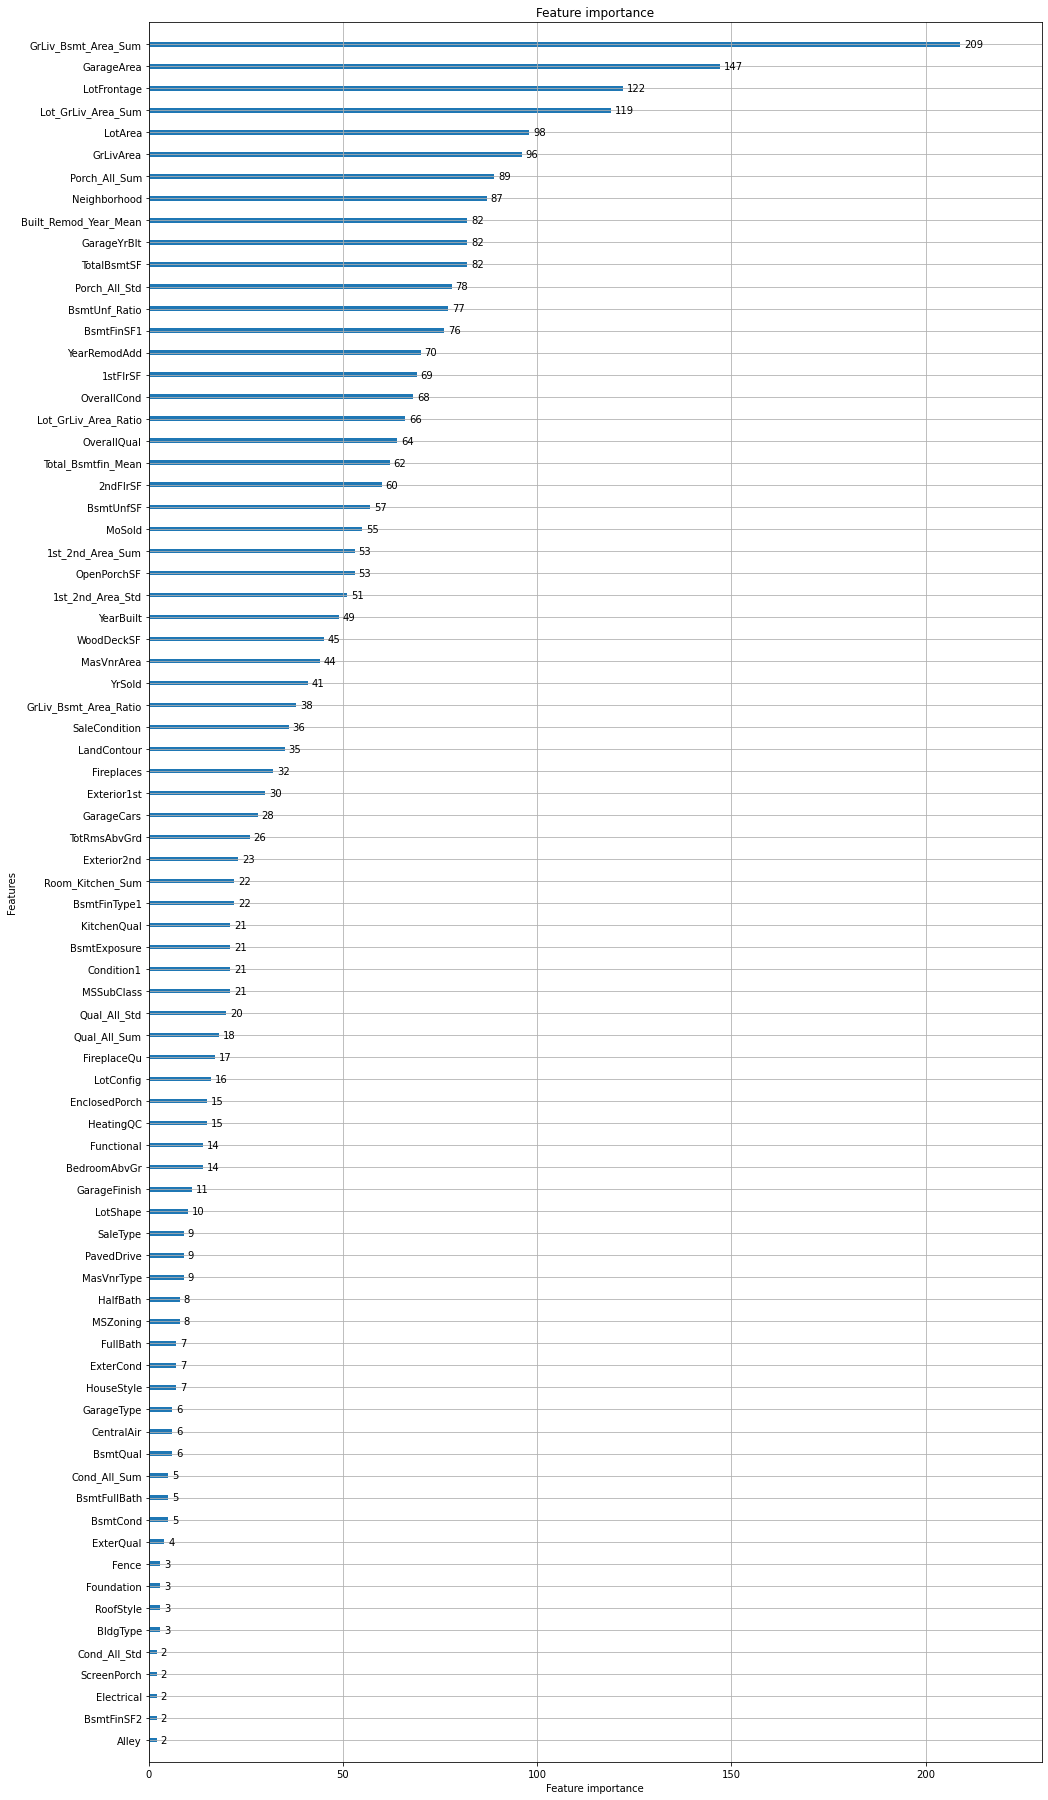

In [19]:
lightgbm.plot_importance(clf, figsize=(16, 32))